# Regression Case - Boston housing - Linear Modelshousing


## Quality metrics

If we denote by $y_i$ the $i$-th target variable and by $\hat y$ our prediction, then we can define:

<div style="float: right; text-align:center; width: 35%">
<figure>
    <img src="figures/r2.svg" alt="Coefficient of Determination"/>
    <figcaption><small>Coefficient of Determination</small></figcaption>
</figure>
<figure>
    <img src="figures/mae2.png" alt="Mean Absolute Error"/>
    <figcaption><small>Mean Absolute Error</small></figcaption>
</figure>
</div>

- Coefficient of determination 
    $$R^2 = 1- \sum_{i=1}^m(y_i-\hat{y}_i)^2/ \sum _{i=1}^m(y_{i}-{\bar {y}})^{2}$$
-  Mean Absolute Error :
    $$ MAE = \frac 1m\sum_{i=1}^m|y_i-\hat{y}_i|$$    
- Mean Squared Error :
    $$MSE = \frac 1m\sum_{i=1}^m(y_i-\hat{y}_i)^2$$ 
- Root Mean Squared Error  :     $RMSE = \sqrt{MSE}$

In [3]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


## Linear models 

The very known model family is the linear regression. Under this model we assume that the target variable can be approximated as a **linear combination** of the numerical features.
For instance in a one dimensional case (a single feauture) the model has the following form:
$$
y = ax + b
$$
where $a$ is is the *slope*, and $b$ is the *intercept*.

In the multi-variate case the function can be expresed as:

$$
y = b + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n
$$

or in its vectorial form

$$ 
Y = w\, X + b
$$

Notice that in general the equality does not hold. 
Regression models usually assumes a probabilistic approach 
$$ 
Y = w\, X + b + \varepsilon
$$

where the error vector $\varepsilon$ is called the residials and is usually expecte to follow a Gaussian distribution.


### Example 01

Consider the following example from Lecture 07

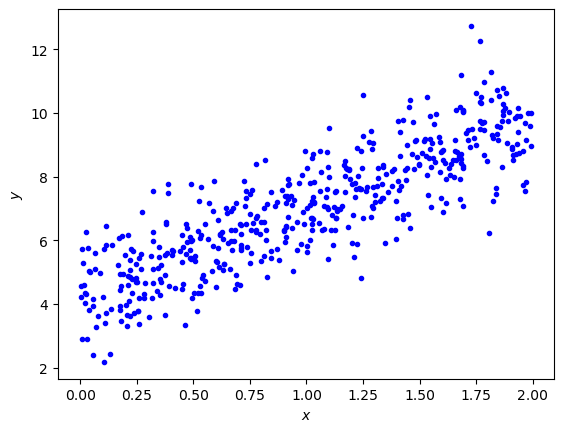

In [2]:
# Generate data
n=500
X = 2*np.random.rand(n,1)
y = 4 +3 * X + np.random.randn(n,1)


plt.plot(X,y,'b.')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

If we minimize the **Mean squared error** then we are trying to minimize the following cost function
$$
    C(b,a) = \frac{1}{m} \sum_{i=1}^m (\hat{y_i}-y_i)^2 = \frac{1}{m} \sum_{i=1}^m (a x+ b-y_i)^2
$$
Where:

- $\hat{y_i}$ denotes our prediction: $\hat{y_i}=a x_i + b$,
- $y_i$ is the value of the target variable, and 
- $n$ is the total number of observations

The gradient of the cost function is given by the following expresions:
$$ \frac{\partial C}{\partial a} = \frac{2}{m} \sum (\hat{y}_i - y_i) \cdot x_i $$
$$ \frac{\partial C}{\partial b} = \frac{2}{m} \sum (\hat{y}_i - y_i) $$

Notice that the function $C$ is convex, thus te global optimum can be obtained analitically by the equation $\nabla C(b,a)=0$.

This conditions lead to the following formula (that we do not prove in this course):
$$
\hat{\boldsymbol{\theta}}=\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}\right)^{-1} \mathbf{X}^{\mathrm{T}} \mathbf{y}
$$

In [3]:
X_b = np.c_[np.ones((n,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

b = theta_best[0][0]
a = theta_best[1][0]
print(f"a = {a}, b = {b}")

a = 2.799825377904363, b = 4.2136210614892065


Let's plot the predictions

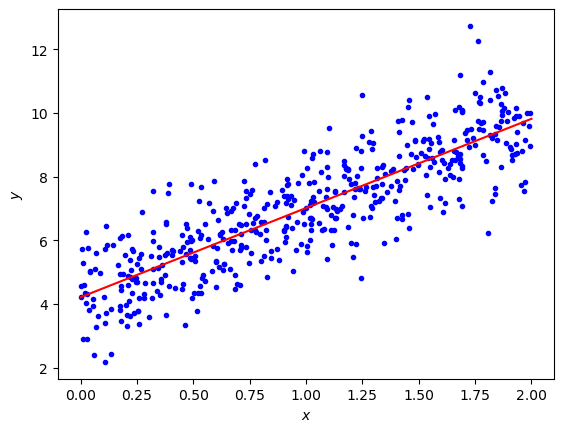

In [4]:
# since is a line we predict just two values
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)

plt.plot(X,y,'b.')
plt.plot(X_new,y_predict,'r-')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

### Residuals

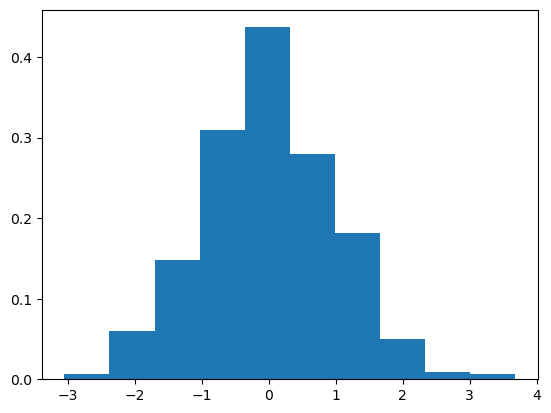

In [5]:
predicted = a*X+b
residuals= y - predicted 
_=plt.hist(residuals, density=True)  

Additionally to the linear dependence of the target respect to the explanatory features

linear models have  several (required) assumptions. For instance  
- the conditional expected values of the residuals given the observations should be zero: $\mathbb{E}(\varepsilon \mid \mathbf{X})=\mathbf{0}$, 
- conditinal variance should be constant throughout observations (Homoskedasticity: $\operatorname{Var}(\boldsymbol{\varepsilon} | \mathbf{X})=\sigma_\epsilon^2 \mathbf{I}$),
while covariance between residuals should be zero ($\operatorname{Cov}\left(\epsilon_i, \epsilon_j \mid \mathbf{X}\right)=0$).
- explanatory features must be linearly independent, that is there is no linear relationship between them. 

![homoscedasticity](figures/homoscedasticity.png)

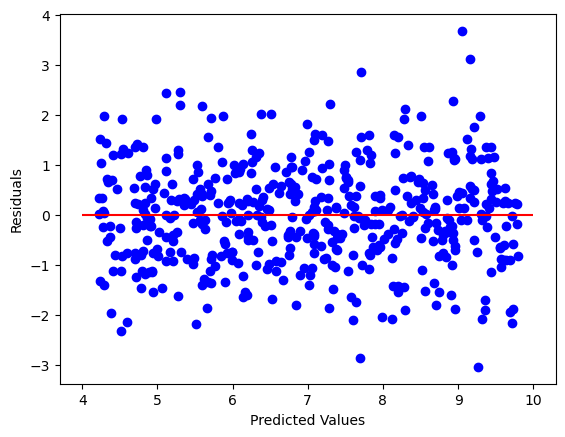

In [6]:
plt.scatter(predicted,residuals, c="b")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.hlines(y=0, xmin=4, xmax=10, color="r")
plt.show()

A further (but not always) required assumption is that residuals are normally distributed.

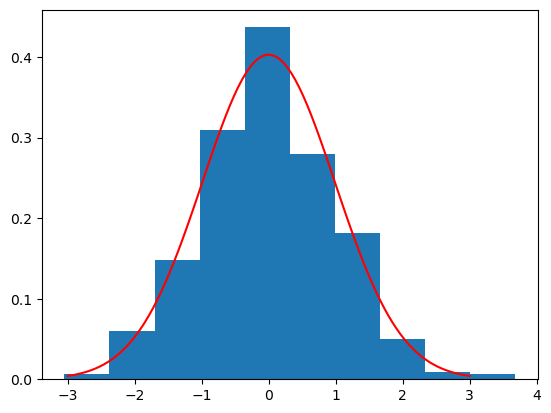

In [7]:
_=plt.hist(residuals, density=True)  

# We test a normal  distribution
dist = getattr(scipy.stats, 'norm')
param = dist.fit(residuals)

err_mean=param[-2]
err_std=param[-1]

x = np.linspace(-3, 3, 100)
plt.plot(x, scipy.stats.norm.pdf(x, err_mean, err_std), 'r')
plt.show() 

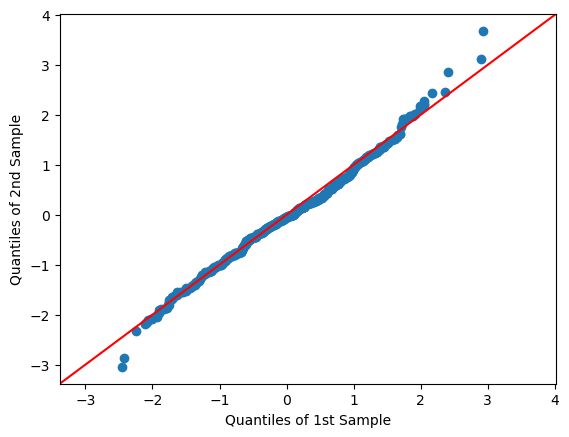

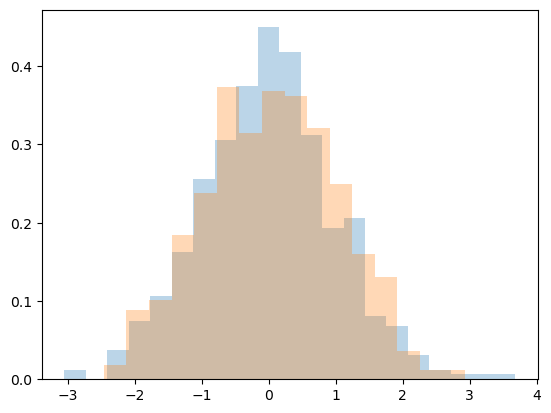

In [8]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from matplotlib import pyplot as plt

# We test a normal distribution
dist = getattr(scipy.stats, 'norm')
param = dist.fit(residuals.flatten())

# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(residuals))
test_dist.sort()

# qq-plot using statsmodels
qqplot_2samples(test_dist,np.array(residuals).flatten(),  line='45')
plt.show()

plt.hist(residuals,alpha=.3, density=True,bins='auto')
plt.hist(test_dist,alpha=.3, density=True,bins='auto')
plt.show()

**Normality Hypothesis test**

In [9]:
# Kolmogorov-Smirnov Test
print(stats.kstest(residuals.flatten(), "norm"))

# normality tests use a (0,1) normal distribution 
# D'agostino normality test
print(stats.normaltest(residuals))
# Shapiro test of normality
print(stats.shapiro(residuals))

KstestResult(statistic=0.03232309586762028, pvalue=0.6607743908512409, statistic_location=0.42800676965827744, statistic_sign=1)
NormaltestResult(statistic=array([3.03862526]), pvalue=array([0.21886227]))
ShapiroResult(statistic=0.9972229599952698, pvalue=0.5650070309638977)


### Example 02 - Real state pricing

In [4]:
data_boston = "./data/boston.txt"
raw_df = pd.read_csv(data_boston, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [5]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


### Data Dictionary

In [6]:
df_boston=pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])
df_boston.drop(columns=['B'], inplace=True)
df_boston.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,27.71
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,5.52
378,23.64820,0.0,18.10,0.0,0.671,6.380,96.2,1.3861,24.0,666.0,20.2,23.69
340,0.06151,0.0,5.19,0.0,0.515,5.968,58.5,4.8122,5.0,224.0,20.2,9.29
18,0.80271,0.0,8.14,0.0,0.538,5.456,36.6,3.7965,4.0,307.0,21.0,11.69


In [7]:
target_df=pd.DataFrame(target, columns=['target'])
target_df.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


We can analyse the relation between the explanatory features and the target, first numerically (linear correlation) and graphically

In [8]:
df_boston.apply(lambda x: x.corr(target_df['target']))

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
LSTAT     -0.737663
dtype: float64

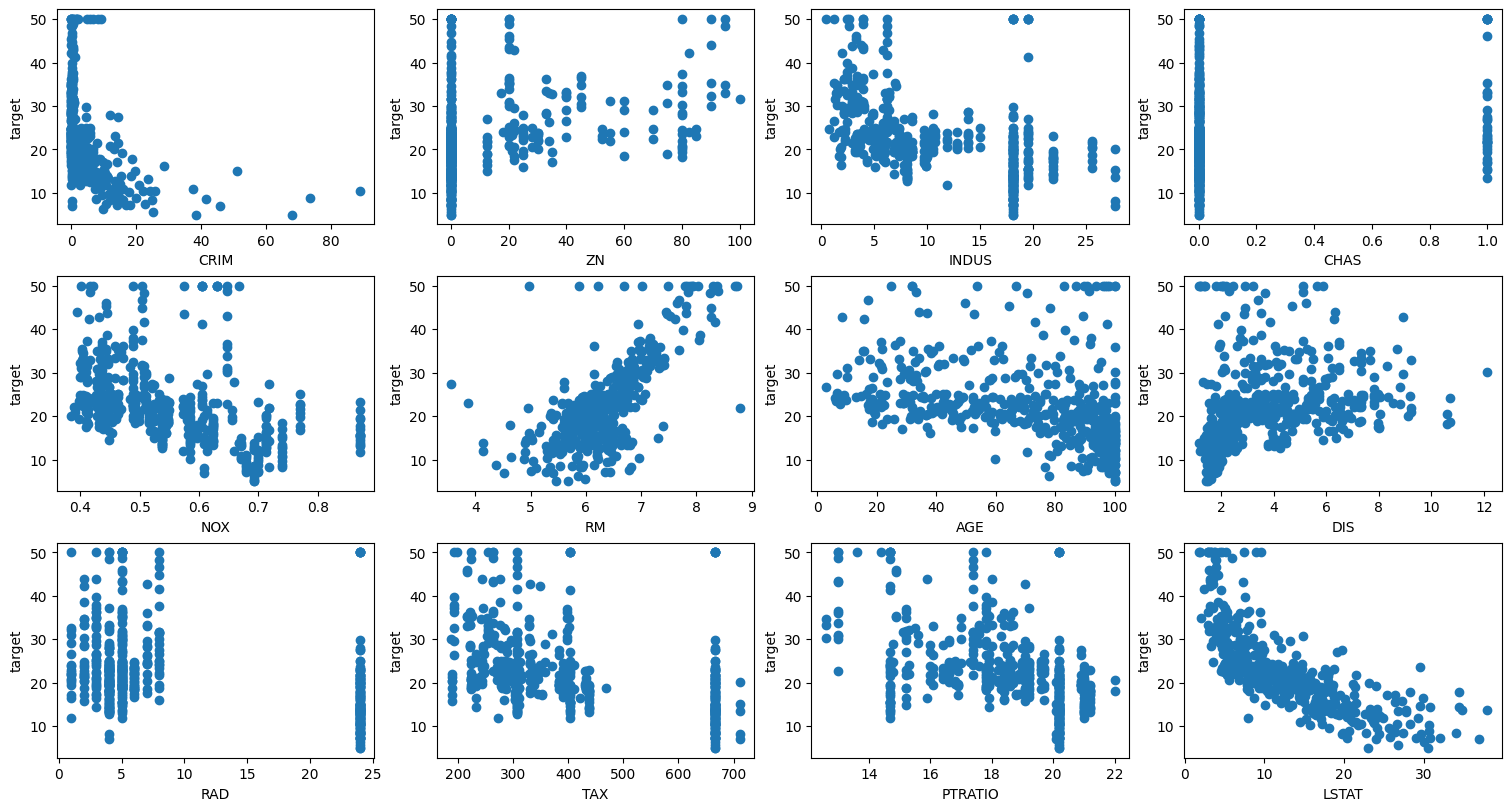

In [9]:
fig, axes = plt.subplots(3, 4,figsize=[15,8],constrained_layout=True)
axes = axes.flatten()
i=0
for x in df_boston.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.scatter(df_boston[x],target)
    plt.xlabel(x)
    plt.ylabel("target")
    i+=1
    
plt.show()

Notice that there is a group of observations having maximum value for the target, independently of the value of the explanatory features

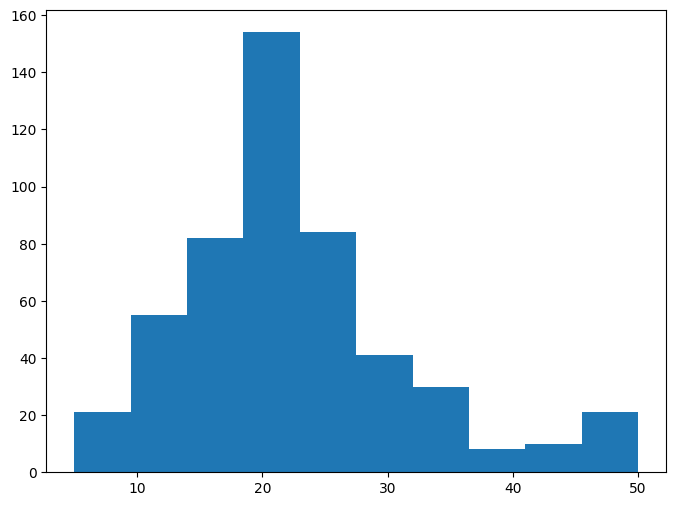

In [10]:
mpl.rcParams['figure.figsize'] = (8, 6)
_=plt.hist(target)

## Univariate Linear regression

From the previous analysis it looks like a good candidate is the variable RM

In [11]:
#Predicting house value from a single feature
X_rooms = df_boston[['RM']]
y = target

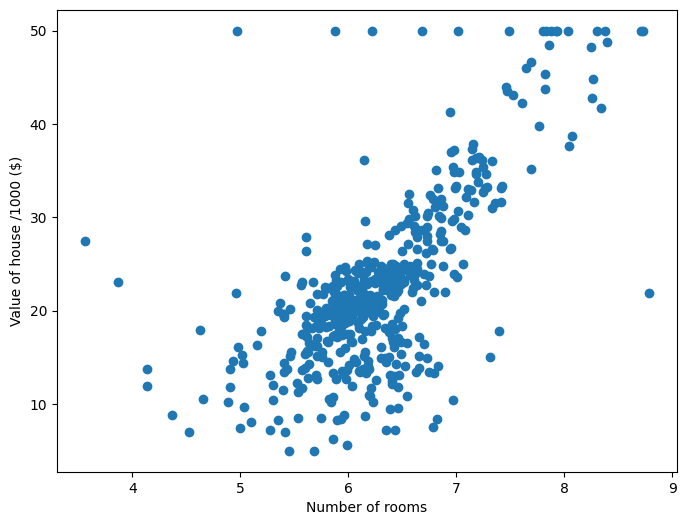

In [12]:
#Let's plot house value as a function of number of rooms using matplotlib's plt dot scatter
%matplotlib inline
plt.scatter(X_rooms,y)
plt.ylabel('Value of house /1000 ($)') #labeling the y label
plt.xlabel('Number of rooms') #labeling the x label
plt.show()
#more rooms lead to higher prices

### Prediction Task

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rooms,y,
                                                    test_size=0.3,
                                                    random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression #Ordinary Least Squares

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

print("Model slope:    ", regr.coef_[0])
print("Model intercept:", regr.intercept_)


Model slope:     9.118102197303786
Model intercept: -34.662307438406785


In [15]:
#DEFINE YOUR REGRESSOR
from sklearn.linear_model import LinearRegression #Ordinary Least Squares
import numpy as np

regressor = LinearRegression()
# fit_intercept : boolean, optional, default True
#    whether to calculate the intercept for this model. 

#copy_X : boolean, optional, default True
#    If True, X will be copied; else, it may be overwritten.

# positive : bool, default=False
#    When set to ``True``, forces the coefficients to be positive. This
#    option is only supported for dense arrays.

In [16]:
#DEFINE YOUR GRIDSEARCH 

from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'positive':[True,False]}

gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV, default metric is R^2

_=gs.fit(X_train,y_train)

In [17]:
#Summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.478013 using {'fit_intercept': True, 'positive': True}
0.478013 (0.042028) with: {'fit_intercept': True, 'positive': True}
0.478013 (0.042028) with: {'fit_intercept': True, 'positive': False}
0.310083 (0.014906) with: {'fit_intercept': False, 'positive': True}
0.310083 (0.014906) with: {'fit_intercept': False, 'positive': False}


In [18]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("")
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("")
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("")
print("r2: ",metrics.r2_score(y_train, gs.predict(X_train)))
print("r2: ",metrics.r2_score(y_test, gs.predict(X_test)))

MAE train:  4.5030631562319705
MAE test:  4.314224104076755

MSE train:  45.01275449524406
MSE test:  40.35144969787306

RMSE train:  6.709154529092623
RMSE test:  6.35227909477166

r2:  0.4878892853275991
r2:  0.45846499343030667


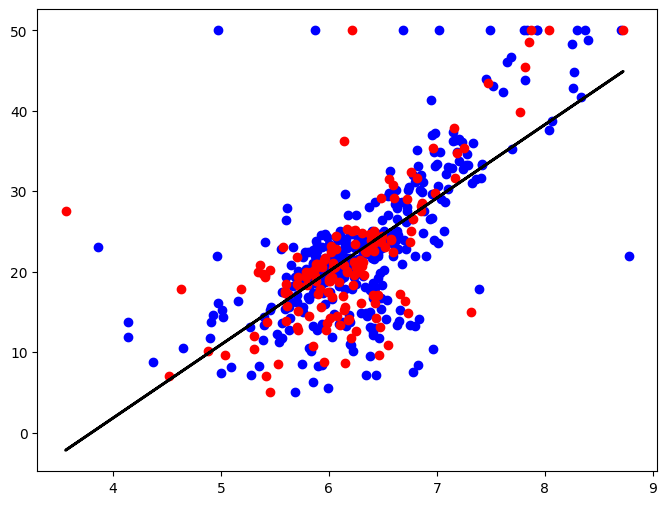

In [19]:
#Plotting train, test, and regression line

plt.scatter(X_train,y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, gs.predict(X_test), color='black',linewidth=2)
plt.show()

In [20]:
#Estimated coefficients for the linear regression problem. 
print('Coefficient: ', gs.best_estimator_.coef_[0])

#Independent term in the linear model.
print('Intercept: ', gs.best_estimator_.intercept_)

Coefficient:  9.118102197303788
Intercept:  -34.66230743840679


### Residual analysis

In [21]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

pd.DataFrame(error_train).describe()

,0
count,3.540000e+02
mean,6.422985e-16
std,6.718651e+00
min,-3.934534e+01
25%,-3.120811e+00
50%,-1.591403e-01
75%,2.478487e+00
max,2.349463e+01


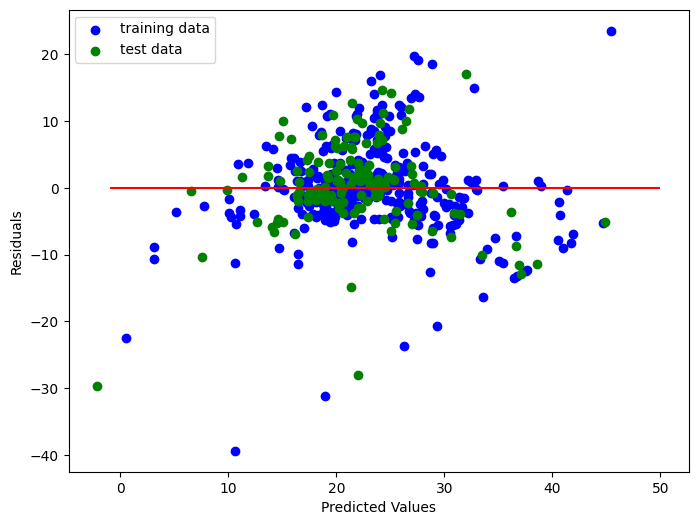

In [22]:
plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-1, xmax=50, color="r")
plt.show()

#### Normality Test

In [23]:
nb_error_train = np.array(error_train).flatten()

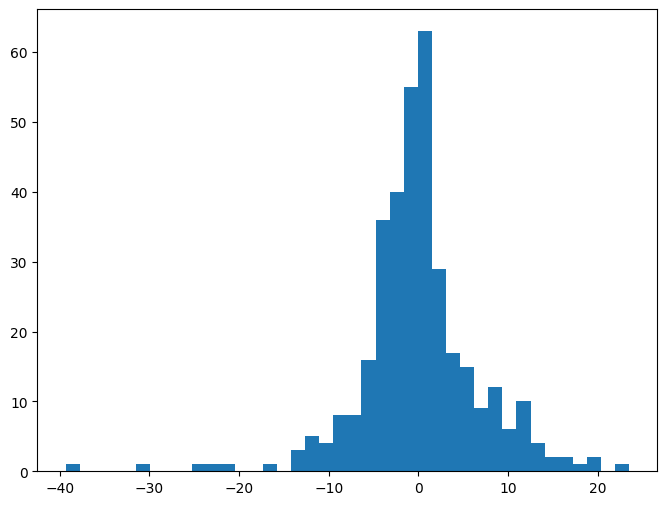

In [24]:
plt.hist(nb_error_train, bins='auto')  
plt.show()

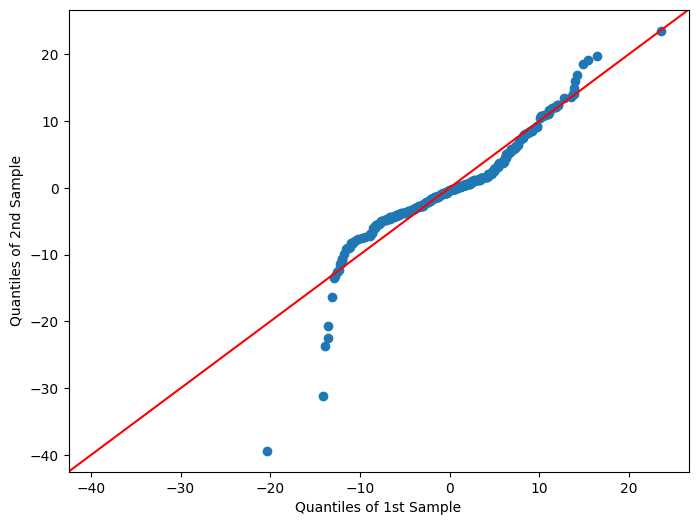

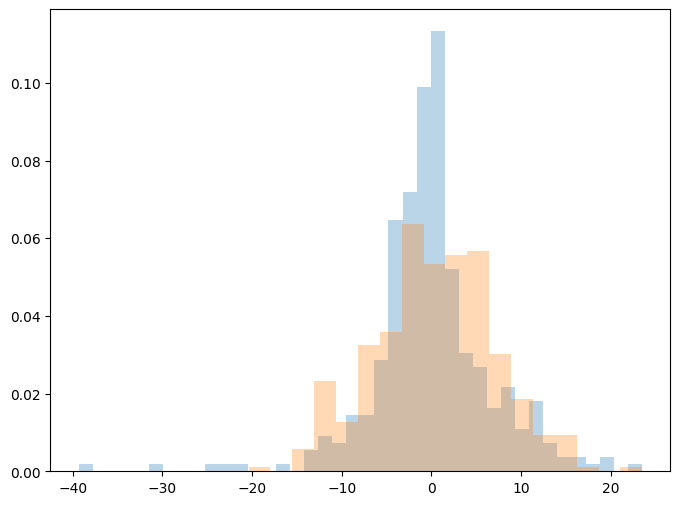

In [25]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from matplotlib import pyplot as plt

# We test a normal distribution
dist = getattr(scipy.stats, 'norm')
param = dist.fit(nb_error_train)
    
err_mean=param[-2]
err_std=param[-1]   

# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(error_train))
test_dist.sort()

# qq-plot using statsmodels
qqplot_2samples(test_dist,np.array(error_train).flatten(),  line='45')
plt.show()

plt.hist(error_train,alpha=.3, density=True,bins='auto')
plt.hist(test_dist,alpha=.3, density=True,bins='auto')
plt.show()

In [26]:
# Kolmogorov-Smirnov Test
#    Test the distribution G(x) against a given distribution F(x).
#    Under the null hypothesis the two distributions are identical, G(x)=F(x).
from scipy import stats
print(stats.kstest(error_train,test_dist))

# D’Agostino Test
#    Under the null hypothesis that the distributions follows a normal distribution.
print(stats.normaltest(error_train))

KstestResult(statistic=0.14124293785310735, pvalue=0.0016907142517670086, statistic_location=1.6141758220947935, statistic_sign=1)
NormaltestResult(statistic=68.44575395211507, pvalue=1.3714923024197424e-15)


## Multi-variate Linear regression

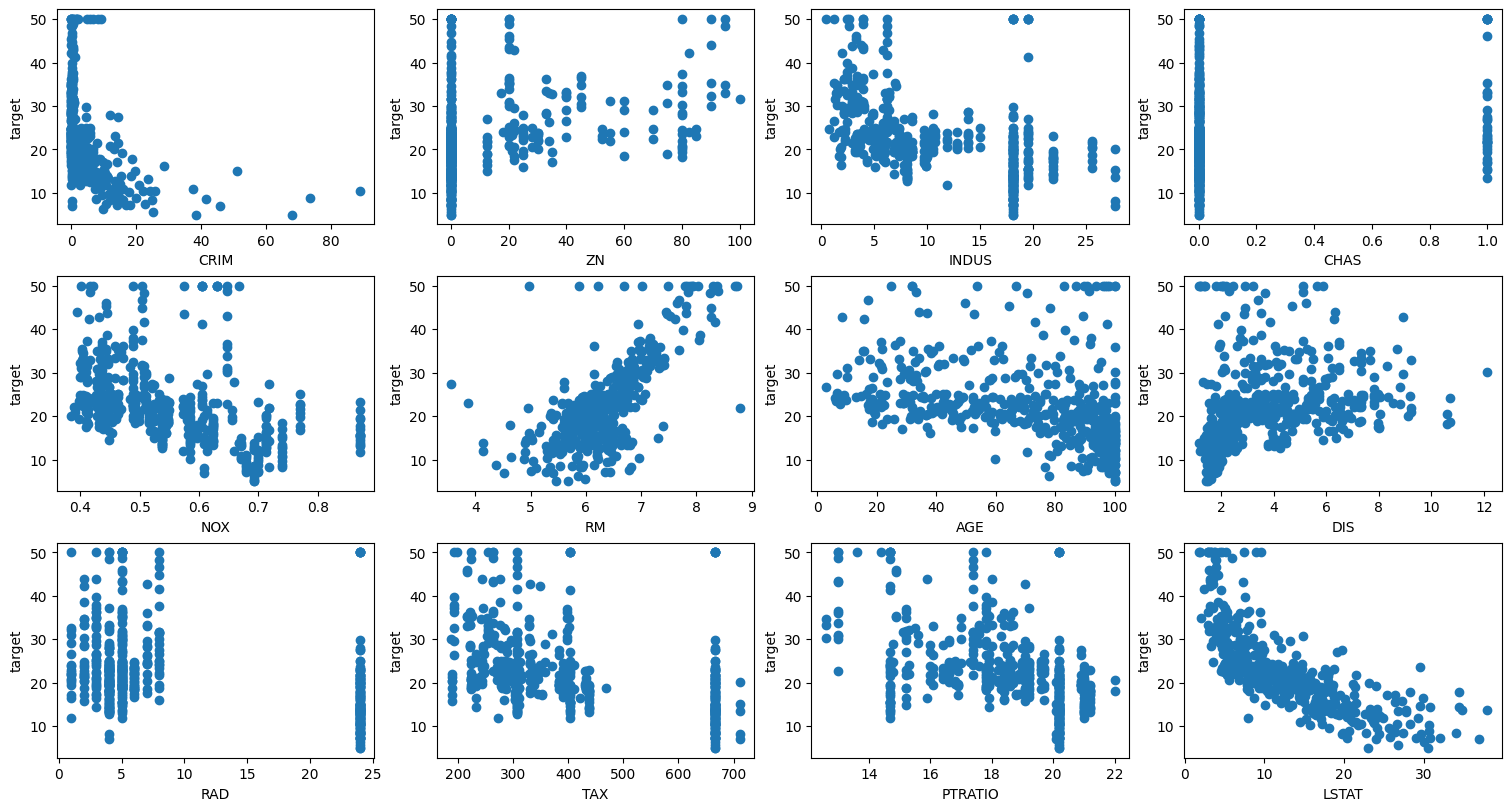

In [27]:
fig, axes = plt.subplots(3, 4,figsize=[15,8],constrained_layout=True)
axes = axes.flatten()
i=0
for x in df_boston.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.scatter(df_boston[x],target)
    plt.xlabel(x)
    plt.ylabel("target")
    i+=1
    
plt.show()

mpl.rcParams['figure.figsize'] = (8, 6)

<Axes: xlabel='LSTAT'>

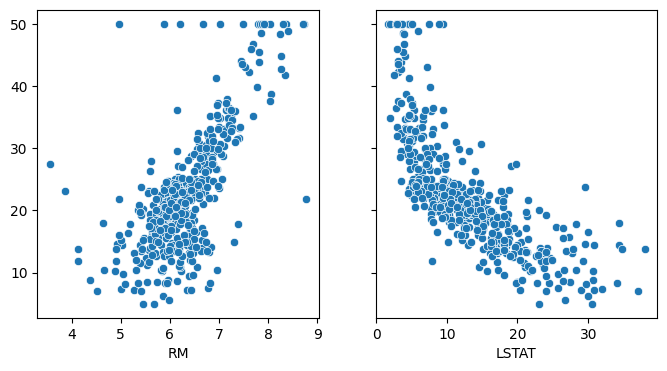

In [28]:
# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=[8,4])
sns.scatterplot(x=df_boston['RM'], y=target, ax=ax1)
sns.scatterplot(x=df_boston['LSTAT'], y=target, ax=ax2)


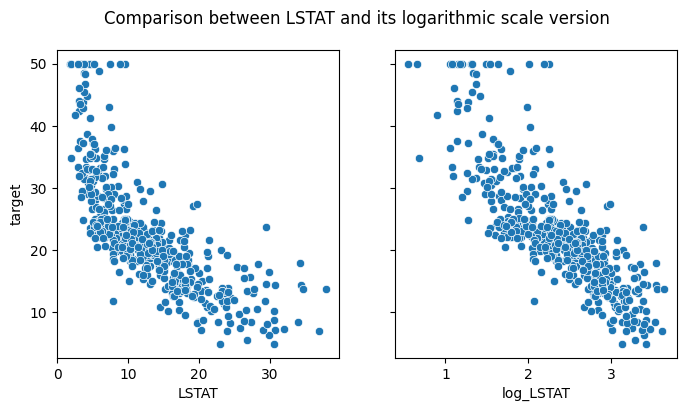

In [29]:
log_LSTAT=np.log(df_boston['LSTAT'])
df_boston['log_LSTAT']=log_LSTAT


# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=[8,4])

sns.scatterplot(x=df_boston['LSTAT'], y=target, ax=ax1)
sns.scatterplot(x=df_boston['log_LSTAT'], y=target, ax=ax2)

fig.suptitle('Comparison between LSTAT and its logarithmic scale version')
_=ax1.set_ylabel('target')


In [30]:
correlations=pd.concat([df_boston,target_df], axis=1).corr().round(2)
correlations

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,log_LSTAT,target
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,0.40,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,-0.48,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,-0.07,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,0.58,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,-0.66,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,0.61,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,-0.48,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,0.46,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,0.52,-0.47


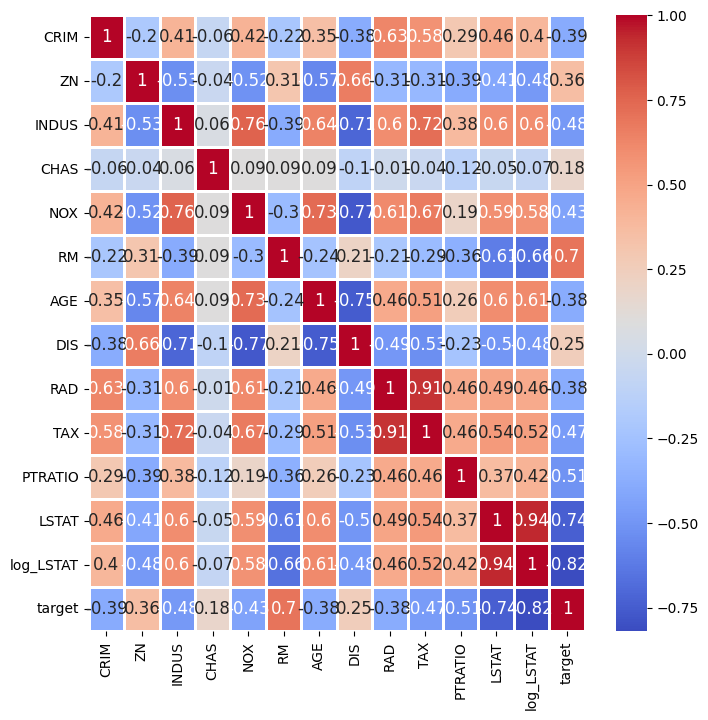

In [31]:
plt.figure(figsize = (8,8))
sns.heatmap(data=correlations, cmap='coolwarm', linewidths=1, annot=True, annot_kws={"size":12})
plt.show()

From this we can see that the two variables with the strongest correlation to MEDV are:
    1) the LSTAT(% lower status of the population)
    2) RM (average number of rooms per dwelling).

We can also use the heatmap to check for correlation between variables so that:
    1) we don’t include multicollinearity into a linear regression. 

For example both RAD and TAX are highly correlated (0.91) so these both shouldn’t be used in a linear regression at the same time.

### Select data

In [32]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,log_LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,1.605430
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,2.212660
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,1.393766
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,1.078410
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,1.673351
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,2.269028
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,2.206074
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,1.729884
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,1.868721


In [33]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,log_LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,1.605430
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,2.212660
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,1.393766
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,1.078410
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,1.673351
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,2.269028
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,2.206074
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,1.729884
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,1.868721


In [34]:
# Separate features and target variables
#X = df_boston[['RM','log_LSTAT']] 
y = target

X = df_boston.drop(columns=['CHAS','LSTAT','TAX']) 

#choose your approach:
#X = df_boston.iloc[:,[4,5,10,11,12]] #if I want to use only some variable
#X = X.drop(['INDUS','CHAS','AGE'], axis=1) #if I want to drop some columns
#X = X[['RM','LSTAT']]#if I want to select some columns

columns = X.columns #column names

# Filter the unusual observation
X=X[y<50]
y=y[y<50]

### Train/test split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=10)

### Standardization

In [36]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

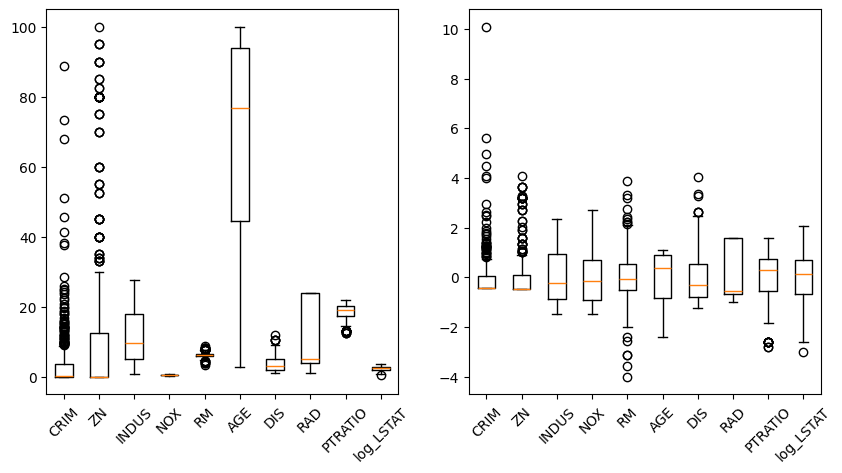

In [37]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5), sharey=False)
_= ax1.boxplot(X,labels=columns)
_= ax2.boxplot(X_train,labels=columns)
ax1.tick_params(axis='x', labelrotation=45)
ax2.tick_params(axis='x', labelrotation=45)

### Hyperparameter tuning - Grid search

In [38]:
regressor = LinearRegression() #(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
parameters = {}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters,cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.762394 using {}
0.762394 (0.041921) with: {}


0.8029719243950948

In [39]:

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("")
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("")
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("")
print("r2 train: ",metrics.r2_score(y_train, gs.predict(X_train)))
print("r2 test: ",metrics.r2_score(y_test, gs.predict(X_test)))

MAE train:  2.7726428040516122
MAE test:  2.687965251628875

MSE train:  12.889243942808585
MSE test:  12.719256880716658

RMSE train:  3.5901593199757285
RMSE test:  3.5664067183534547

r2 train:  0.7867769684136119
r2 test:  0.8029719243950948


Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

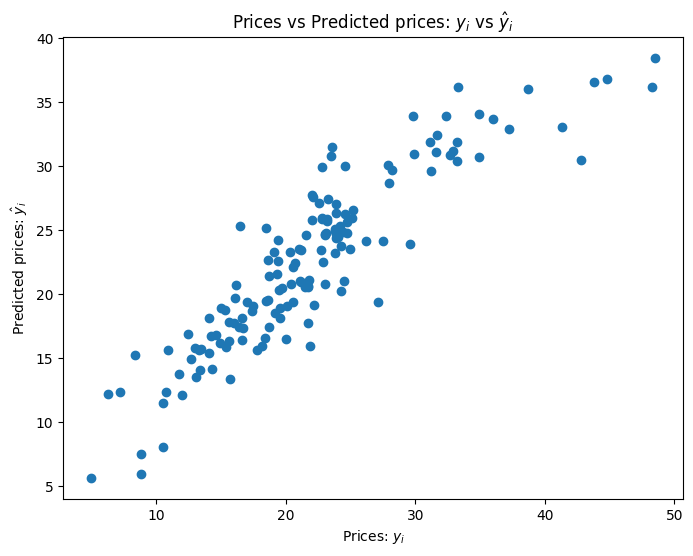

In [40]:
plt.scatter(y_test, gs.predict(X_test))
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

In [41]:
#Independent term in the linear model.
print('Intercept: ', gs.best_estimator_.intercept_)

gs.best_estimator_.coef_

Intercept:  21.48192419825073


array([-1.1968494 ,  0.18063706, -1.05648617, -1.59987287,  1.40235629,
        0.07751421, -2.41079444,  0.58428249, -1.85122812, -4.10553574])

In [42]:
pd.DataFrame(list(zip(columns,gs.best_estimator_.coef_)), columns = ['features','estimated Coefficients'])

,features,estimated Coefficients
0,CRIM,-1.196849
1,ZN,0.180637
2,INDUS,-1.056486
3,NOX,-1.599873
4,RM,1.402356
5,AGE,0.077514
6,DIS,-2.410794
7,RAD,0.584282
8,PTRATIO,-1.851228
9,log_LSTAT,-4.105536


In [43]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

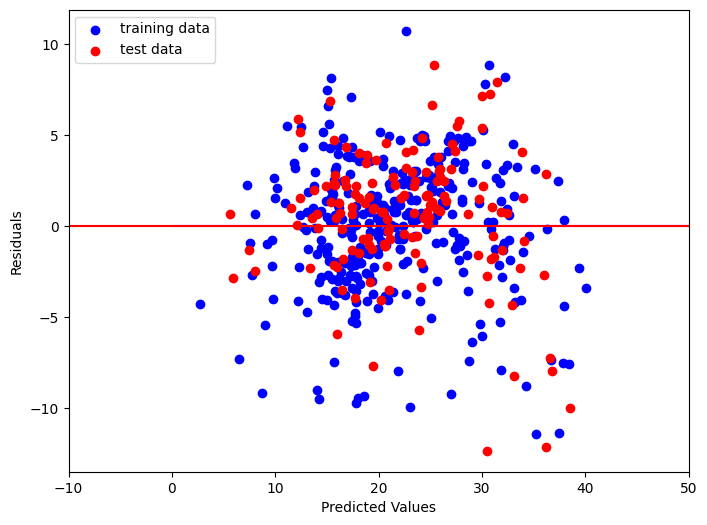

In [44]:
plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="r", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-0, xmax=50, color="b")
plt.hlines(y=error_train.mean(), xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

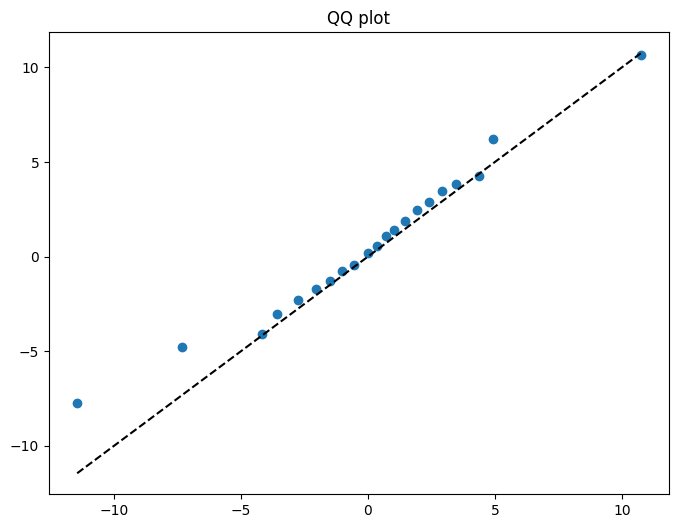

In [45]:
# We test a exponential distribution
dist = getattr(scipy.stats, 'norm')
param = dist.fit(error_test)

err_mean=param[-2]
err_std=param[-1]

# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(*param[0:-2],loc=err_mean, scale=err_std, size = len(error_test))

# We create the percentiles for both distributions
test_dist.sort()
percs = np.linspace(0,100,21)
q_a = np.percentile(error_train, percs)
q_b = np.percentile(test_dist, percs)

# and generate the QQ-plot 
plt.plot(q_a,q_b, ls="", marker="o")
plt.title("QQ plot")
x = np.linspace(np.min((q_a.min(),q_b.min())), np.max((q_a.max(),q_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.show()

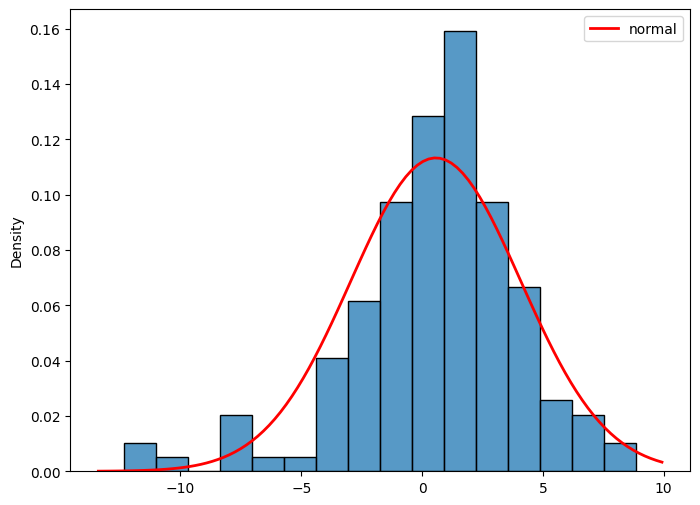

In [46]:
# plot the distribution and compare with a normal
ax = sns.histplot(error_test, stat='density')

# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, loc=err_mean, scale=err_std)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='normal')                                                   
ax.legend() 

In [47]:
# Kolmogorov-Smirnov Test
from scipy import stats
#print(stats.kstest(scaled_error_train, "norm"))
print(stats.kstest(error_test, test_dist))
# normality tests use a (0,1) normal distribution 
# D'agostino normality test
print(stats.normaltest(error_test))
# Shapiro test of normality
print(stats.shapiro(error_test))

KstestResult(statistic=0.10884353741496598, pvalue=0.3495623636409321, statistic_location=0.6409093151191896, statistic_sign=-1)
NormaltestResult(statistic=26.89170433622482, pvalue=1.4472401382910314e-06)
ShapiroResult(statistic=0.9478684663772583, pvalue=2.6359708499512635e-05)


## Test parameters (statsmodels)

If the linear model hypothesis hold, we have that coefficients are normally distributed:
$$
\hat w \sim \mathcal N(w,(X'X)^{-1}\sigma^2).
$$
Thus, it is possible to perform a further analysis to the model coefficient finding their significance via confidence intervals from  null hypothesis $w_i=0$ 
     $$
     \frac{\hat w_i}{\hat\sigma\sqrt{(X'X)_{ii}}}\sim t_{m-n-1}
     $$



In [48]:
XX = X[['RM','log_LSTAT']]

In [49]:
X_ols = sm.add_constant(X_train)
#X_ols = sm.add_constant(XX)

#If we want to add a constant to our model 
est = sm.OLS(y_train, X_ols,)
#est = sm.OLS(y, XX,)
est_fit = est.fit()
est_fit.params

array([21.4819242 , -1.1968494 ,  0.18063706, -1.05648617, -1.59987287,
        1.40235629,  0.07751421, -2.41079444,  0.58428249, -1.85122812,
       -4.10553574])

In [50]:
pd.DataFrame(list(zip(columns,gs.best_estimator_.coef_)), columns = ['features','estimated Coefficients'])

,features,estimated Coefficients
0,CRIM,-1.196849
1,ZN,0.180637
2,INDUS,-1.056486
3,NOX,-1.599873
4,RM,1.402356
5,AGE,0.077514
6,DIS,-2.410794
7,RAD,0.584282
8,PTRATIO,-1.851228
9,log_LSTAT,-4.105536


In [51]:
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     122.5
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          5.00e-105
Time:                        15:48:35   Log-Likelihood:                -925.12
No. Observations:                 343   AIC:                             1872.
Df Residuals:                     332   BIC:                             1914.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.4819      0.197    109.026      0.0

## Regression Shrinkage Methods (Regularization)

Generally, in prediction task there are two driving forces which lead the modellingo process:

- On the one hand, we desire to maximize the quality of our prediction, but
- we want a parsimonious model: fast and easier to interpret.

In the the case of (simple) linear models, this is take shape in two main issues. 

- the use of too many explanatory features,
- and an ill-conditioned problem: notice that the estimators depend upon te inverse of $\left(X^{\prime} X\right)$, which is not invertible in the case of linear dependency of the explanatory features. Moreover if the matrix $\left(X^{\prime} X\right)$ is near to be non-invertible, small variations entail large changes in $\left(X^{\prime} X\right)^{-1}$.

### Ridge and Lasso Regression

If our linear model is of the form
$$
y = b + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n
$$
   
   - Ridge $$
    \min_w \alpha \|w\|^2 + \|\text{residuals}\|^2=\min_w \alpha ||w||^2 + (y-Xw)^\top(y-Xw)
    $$
   - Lasso:    $$
    \min_w \alpha |w| + \|\text{residuals}\|^2=\min_w \alpha |w| + (y-Xw)^\top(y-Xw)
    $$

<table><tr>
<td> <img src="figures/regularization_0.png" alt="Linear Regression" style="width: 350px;"/>
    <figcaption><small>Linear Regression</small></figcaption>  </td>
<td> <img src="figures/regularization_1.png" alt="Ridge Regression" style="width: 350px;"/>
    <figcaption><small>Ridge Regression</small></figcaption>  </td>
<td> <img src="figures/regularization_2.png" alt="Lasso Regression" style="width: 350px;"/>
    <figcaption><small>Lasso Regression</small></figcaption>  </td>
</tr></table>

Minimizing the error to fit to our data, models are penalized for coefficients with a large magnitude: large positive and large negative coefficients

NOTE that $\alpha$ is a parameter that we need to choose in order to fit and predict and we can select it to adjust our model requirments (hyper parameter tuning)

A way to interpretate $\alpha$ is as a model complexity control: $\alpha=0$ is the OLS while large values of alpha tends to **regularize** the model making it simpler.

![shrinkage](figures/regularization_coeff.png)

In the figure $C=1/\alpha$


#### Ridge regression

In [52]:
from sklearn.linear_model import Ridge

regressor = Ridge()

parameters = {"alpha": [0.01,1,10,100]}
#note that we set alpha using the argument alpha
#also notice the argument normalize: setting this equal to True ensures that all 
#our variables are on the same scale

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#test on hold-out
print("")
print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("")
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("")
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("")
print("r2 train: ",metrics.r2_score(y_train, gs.predict(X_train)))
print("r2 test: ",metrics.r2_score(y_test, gs.predict(X_test)))

***GRIDSEARCH RESULTS***
Best score: 0.763541 using {'alpha': 10}
0.762399 (0.041911) with: {'alpha': 0.01}
0.762816 (0.041015) with: {'alpha': 1}
0.763541 (0.035254) with: {'alpha': 10}
0.725268 (0.022103) with: {'alpha': 100}

MAE train:  2.7689025485337666
MAE test:  2.692937806383574

MSE train:  12.951101857987238
MSE test:  12.743008179514305

RMSE train:  3.5987639347402656
RMSE test:  3.5697350293144035

r2 train:  0.7857536708283905
r2 test:  0.8026040041039092


In [53]:
ridge_regressor_1=Ridge(alpha=0)
ridge_regressor_2=Ridge(alpha=100)

_=ridge_regressor_1.fit(X_train,y_train)
_=ridge_regressor_2.fit(X_train,y_train)

<BarContainer object of 10 artists>

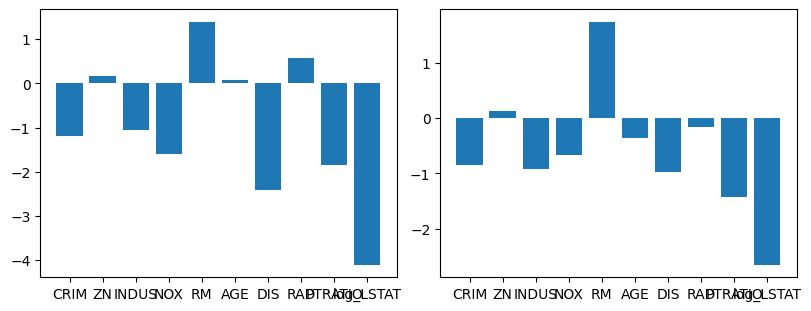

In [54]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=[8,3],constrained_layout=True)
ax1.bar(x=columns,height=ridge_regressor_1.coef_)
ax2.bar(x=columns,height=ridge_regressor_2.coef_)

#### Lasso regression

In [55]:
from sklearn.linear_model import Lasso

regressor = Lasso()
parameters = {"alpha": [0.01,1,10,100]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

lasso_coef = gs.best_estimator_.coef_
print(lasso_coef)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#test on hold-out
print("")
print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("")
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("")
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("")
print("r2 train: ",metrics.r2_score(y_train, gs.predict(X_train)))
print("r2 test: ",metrics.r2_score(y_test, gs.predict(X_test)))

[-1.16206965  0.15305217 -1.03759688 -1.52650818  1.41760889  0.03186101
 -2.34930983  0.52206741 -1.83115923 -4.08476626]
***GRIDSEARCH RESULTS***
Best score: 0.762743 using {'alpha': 0.01}
0.762743 (0.041497) with: {'alpha': 0.01}
0.695488 (0.032593) with: {'alpha': 1}
-0.006654 (0.004724) with: {'alpha': 10}
-0.006654 (0.004724) with: {'alpha': 100}

MAE train:  2.7700515664827394
MAE test:  2.6907770161798092

MSE train:  12.892749962148153
MSE test:  12.711701405060992

RMSE train:  3.5906475686355175
RMSE test:  3.565347304970582

r2 train:  0.7867189693505404
r2 test:  0.803088962744322


## General models

Linear models can be generalized to nonlinear relationships between variables.
This can be accomplished by creating new variables capturing the non linear relation between the explanatory features and the target according to to *basis functions*: polynomials, kernels, etc.
    $$
    Y=\sum_{h} w_h\,g_h(X_1,X_2,\ldots,X_n)+b+\varepsilon
    $$

For example, a quadratic polynomial basis
    $$
    Y=X_{1}w_{1}+X_{2}w_{2}+X_{1}^2w_{3}+X_{2}^2w_{4}+[X_{1}X_2]w_{5}+b+\varepsilon
    $$

Notice that in this case we are projecting a two-dimensional $X$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $X$ and $Y$.